In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
from sklearn.svm import SVC
svm1 = SVC()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True, random_state=0)

In [ ]:
for i, (idx_train, idx_cv) in enumerate(cv.split(tcgaf)):
    df_train = tcgaf.iloc[idx_train]
    df_cv = tcgaf.iloc[idx_cv]

    x_train = df_train.drop(['y'], axis=1)
    y_train = df_train['y']

    x_cv = df_cv.drop(['y'], axis=1)
    y_cv = df_cv['y']

    print('[K =',i,']')
    print('===svm===')
    svm1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, svm1.predict(x_train)), accuracy_score(y_cv, svm1.predict(x_cv))))
    print('===random forest===')
    rf1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, rf1.predict(x_train)), accuracy_score(y_cv, rf1.predict(x_cv))))
    print()

[K = 0 ]
===svm===
train accurcacy = 0.9717425431711146, cv accurcacy = 0.94375
===random forest===
train accurcacy = 1.0, cv accurcacy = 0.975

[K = 1 ]
===svm===
train accurcacy = 0.9717425431711146, cv accurcacy = 0.95625
===random forest===
train accurcacy = 1.0, cv accurcacy = 0.975

[K = 2 ]
===svm===
train accurcacy = 0.9733542319749217, cv accurcacy = 0.949685534591195
===random forest===
train accurcacy = 1.0, cv accurcacy = 0.9559748427672956

[K = 3 ]
===svm===
train accurcacy = 0.9717868338557993, cv accurcacy = 0.949685534591195
===random forest===
train accurcacy = 1.0, cv accurcacy = 0.9811320754716981

[K = 4 ]
===svm===
train accurcacy = 0.9670846394984326, cv accurcacy = 0.9874213836477987
===random forest===
train accurcacy = 1.0, cv accurcacy = 0.9748427672955975



In [ ]:
    print('[K =',i,']')
    print('===svm===')
    svm1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, svm1.predict(x_train)), accuracy_score(y_cv, svm1.predict(x_cv))))
    print('===random forest===')
    rf1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, rf1.predict(x_train)), accuracy_score(y_cv, rf1.predict(x_cv))))
    print()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# SVM 모델
best_svm_model = None
best_svm_accuracy = 0

for i, (idx_train, idx_cv) in enumerate(cv.split(tcgaf)):
    df_train = tcgaf.iloc[idx_train]
    df_cv = tcgaf.iloc[idx_cv]

    x_train = df_train.drop(['y'], axis=1)
    y_train = df_train['y']

    x_cv = df_cv.drop(['y'], axis=1)
    y_cv = df_cv['y']

    svm_model = SVC()
    svm_model.fit(x_train, y_train)
    cv_accuracy = cross_val_score(svm_model, x_cv, y_cv, cv=5).mean()

    print('[K =',i,']')
    print("cv accurcacy = {}".format(cv_accuracy))
    print()

    if cv_accuracy > best_svm_accuracy:
        best_svm_model = svm_model
        best_svm_accuracy = cv_accuracy

print("Best SVM Model Accuracy:", best_svm_accuracy)

[K = 0 ]
cv accurcacy = 0.94375

[K = 1 ]
cv accurcacy = 0.95

[K = 2 ]
cv accurcacy = 0.9433467741935484

[K = 3 ]
cv accurcacy = 0.9433467741935484

[K = 4 ]
cv accurcacy = 0.9620967741935484

Best SVM Model Accuracy: 0.9620967741935484


In [ ]:
# Random Forest 모델
best_rf_model = None
best_rf_accuracy = 0

for i, (idx_train, idx_cv) in enumerate(cv.split(tcgaf)):
    df_train = tcgaf.iloc[idx_train]
    df_cv = tcgaf.iloc[idx_cv]

    x_train = df_train.drop(['y'], axis=1)
    y_train = df_train['y']

    x_cv = df_cv.drop(['y'], axis=1)
    y_cv = df_cv['y']

    rf_model = RandomForestClassifier()
    rf_model.fit(x_train, y_train)
    cv_accuracy = cross_val_score(rf_model, x_cv, y_cv, cv=5).mean()

    print('[K =',i,']')
    print("cv accurcacy = {}".format(cv_accuracy))
    print()

    if cv_accuracy > best_rf_accuracy:
        best_rf_model = rf_model
        best_rf_accuracy = cv_accuracy

print("Best Random Forest Model Accuracy:", best_rf_accuracy)

[K = 0 ]
cv accurcacy = 0.975

[K = 1 ]
cv accurcacy = 0.975

[K = 2 ]
cv accurcacy = 0.9497983870967742

[K = 3 ]
cv accurcacy = 0.975

[K = 4 ]
cv accurcacy = 0.98125

Best Random Forest Model Accuracy: 0.98125


<ipython-input-24-79ee019cb716>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Value", y="Feature", data=top_30_features, palette='viridis')


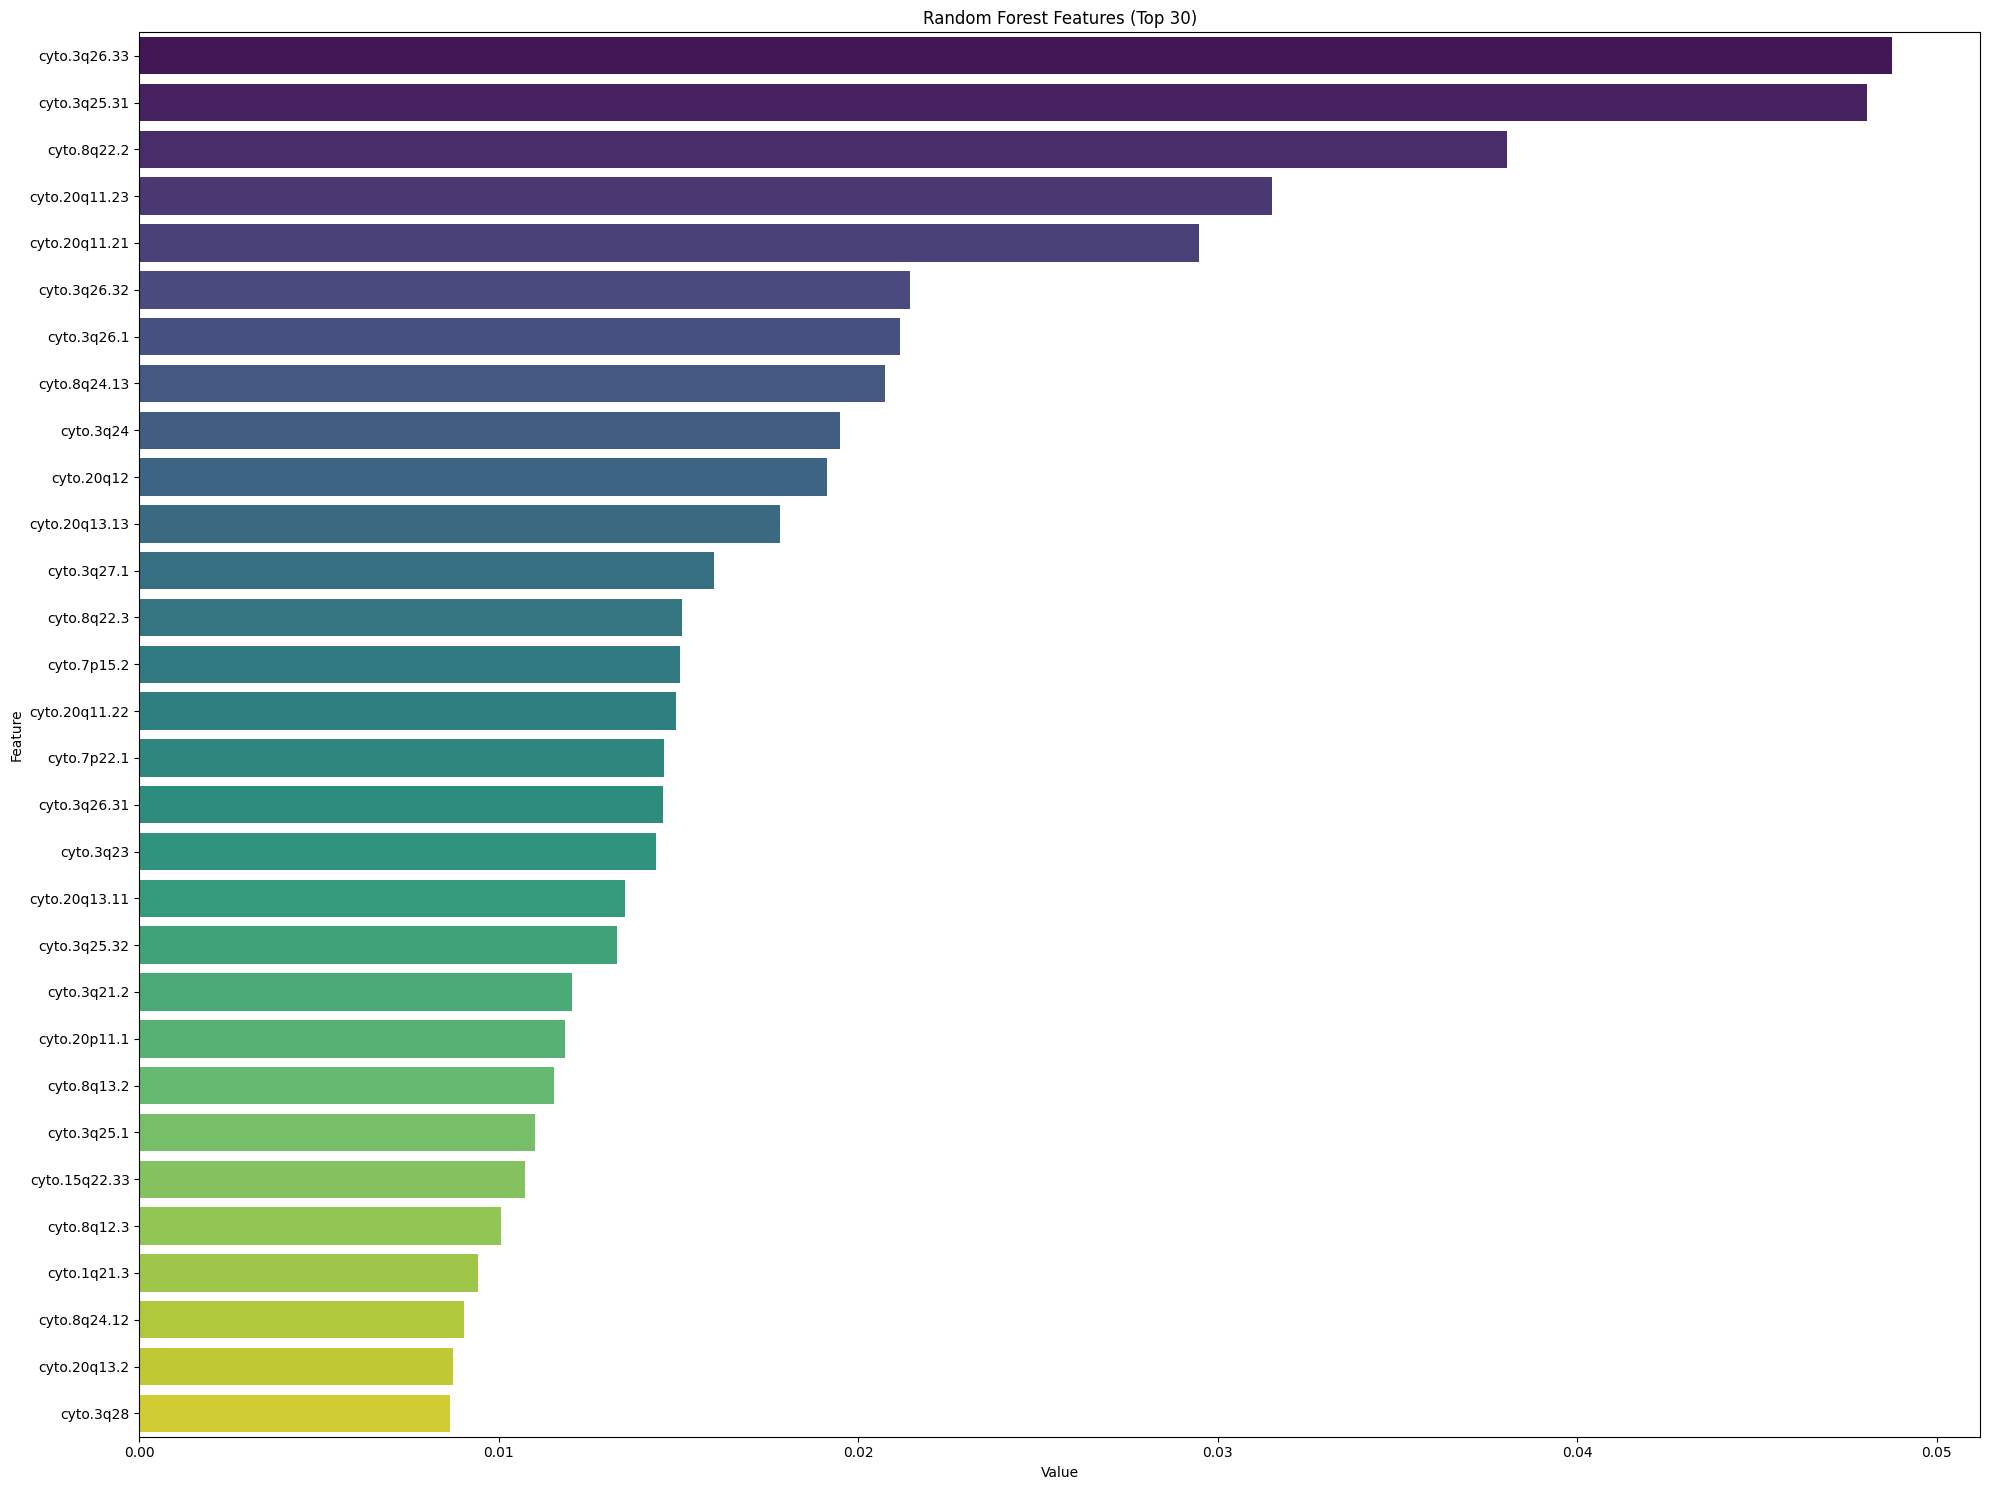

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_imp = pd.DataFrame(sorted(zip(rf1.feature_importances_, x_train.columns)), columns=['Value','Feature'])
top_30_features = feature_imp.sort_values(by="Value", ascending=False).head(30)

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=top_30_features, palette='viridis')
plt.title('Random Forest Features (Top 30)')
plt.tight_layout()
plt.show()

<Axes: >

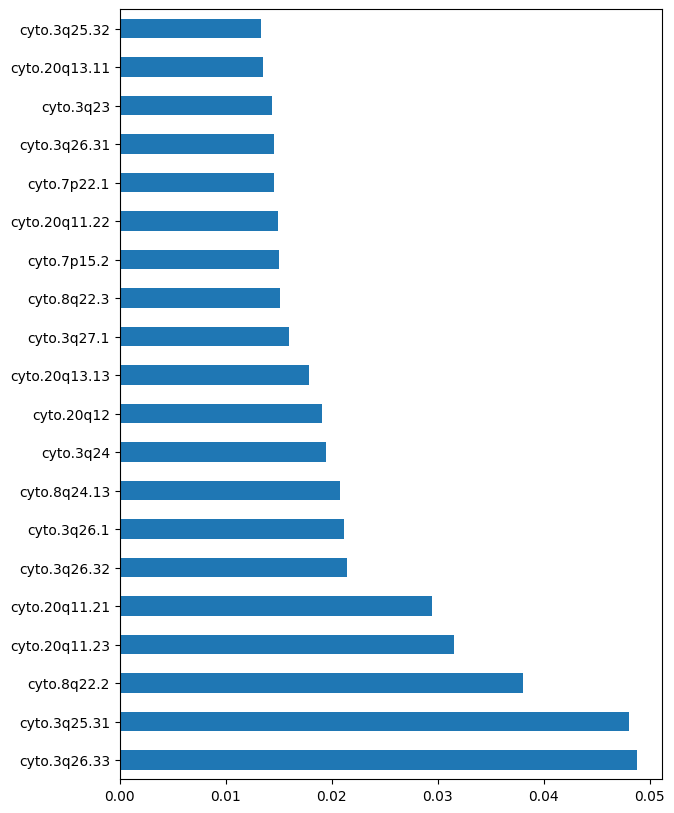

In [ ]:
plt.figure(figsize = (7,10))
feat_importances = pd.Series(rf1.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
feat_importances.nlargest(20)

cyto.3q26.33     0.048770
cyto.3q25.31     0.048064
cyto.8q22.2      0.038056
cyto.20q11.23    0.031497
cyto.20q11.21    0.029486
cyto.3q26.32     0.021428
cyto.3q26.1      0.021167
cyto.8q24.13     0.020748
cyto.3q24        0.019499
cyto.20q12       0.019122
cyto.20q13.13    0.017816
cyto.3q27.1      0.015977
cyto.8q22.3      0.015087
cyto.7p15.2      0.015046
cyto.20q11.22    0.014936
cyto.7p22.1      0.014594
cyto.3q26.31     0.014563
cyto.3q23        0.014382
cyto.20q13.11    0.013505
cyto.3q25.32     0.013280
dtype: float64

## Testing

In [ ]:
# 테스트 데이터셋 준비
x_test = urinef.drop(['y'], axis=1)
y_test = urinef['y']

# SVM 모델 평가
svm_accuracy = accuracy_score(y_test, best_svm_model.predict(x_test))
print("SVM:", svm_accuracy)

# Random Forest 모델 평가
rf_accuracy = accuracy_score(y_test, best_rf_model.predict(x_test))
print("Random Forest:", rf_accuracy)


SVM: 0.6857142857142857
Random Forest: 0.6


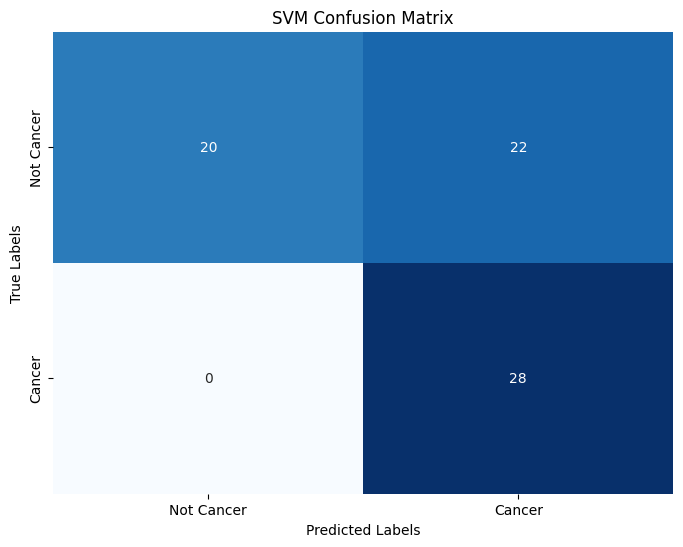

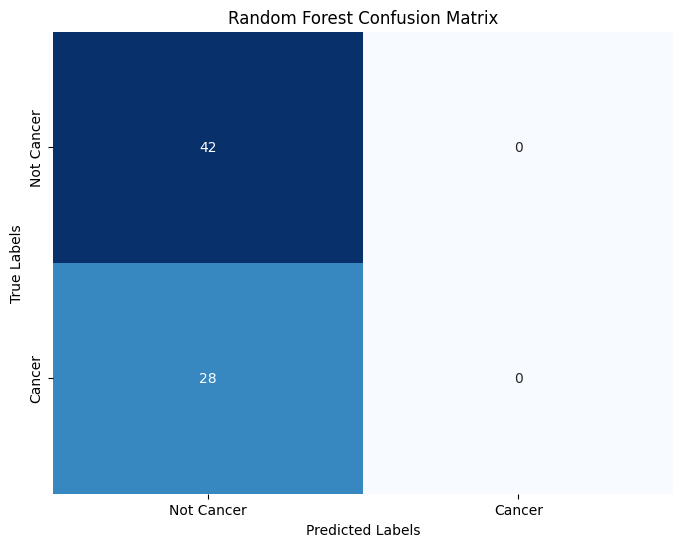

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# SVM 모델의 confusion matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=[0.5, 1.5], labels=["Not Cancer", "Cancer"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Cancer", "Cancer"])
plt.show()

# Random Forest 모델의 confusion matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=[0.5, 1.5], labels=["Not Cancer", "Cancer"])
plt.yticks(ticks=[0.5, 1.5], labels=["Not Cancer", "Cancer"])
plt.show()
